In [118]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

In [119]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    
    # Normalization can be applied by setting `normalize=True`.

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [120]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [121]:
X_axis = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X_axis.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [122]:
# Lets map the success counts for the landings of the Falcon 9 rockets.

In [123]:
Y_axis = data['Class']
type(Y_axis)

pandas.core.series.Series

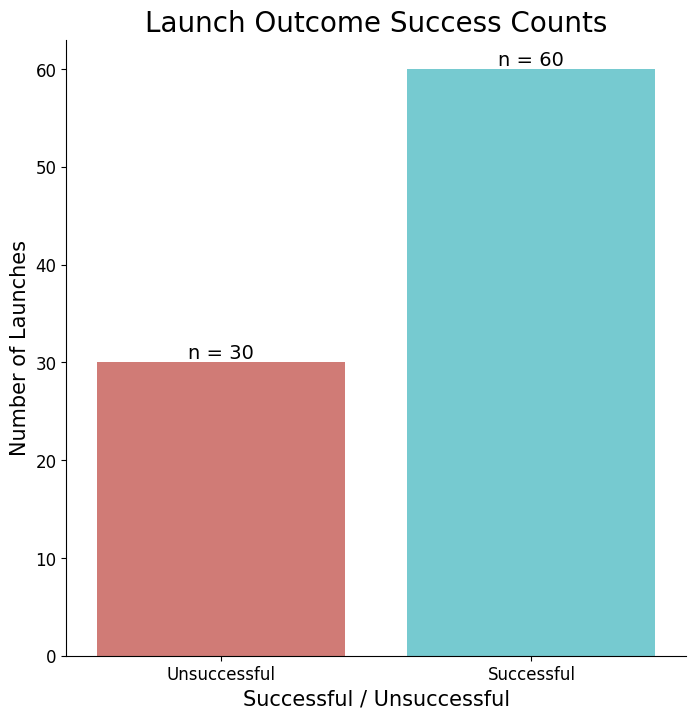

In [124]:
df = Y_axis.value_counts()
plt.figure(figsize = (8,8))
ax=sns.barplot(x = df.index, y = df.values, hue = df.index, palette='hls', alpha = 0.9, legend = False)
sns.despine(top = True, right = True, left = False, bottom = False)
for p in ax.patches:
    ax.annotate('n = {:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), 
                ha = 'center', va = 'bottom', color = 'black', fontsize = 14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Unsuccessful', 'Successful'], fontsize=12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Launch Outcome Success Counts', fontsize = 20)
plt.ylabel('Number of Launches',fontsize = 15)
plt.xlabel('Successful / Unsuccessful',fontsize = 15)
plt.show()

In [125]:
# Split data into training and test data.

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X_axis, Y_axis, test_size=0.2, random_state=2)

In [127]:
X_train.shape # 72 Records for our training set

(72, 83)

In [128]:
X_test.shape # 18 records for our testing set

(18, 83)

In [129]:
# Standardize our data set

In [130]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
# Were going to use a logstic regression model. This code is performing hyperparameter tuning for a logistic regression model using cross-validation.

In [132]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
lr=LogisticRegression(random_state=1)
logreg_cv = GridSearchCV(lr, parameters, cv=10, refit=True)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [133]:
print("Tuned hyperparameters:",logreg_cv.best_params_)
print("Cross-validation accuracy:",logreg_cv.best_score_)

Tuned hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Cross-validation accuracy: 0.8464285714285713


In [134]:
# Lets calculate the accuracy on our test data:

In [135]:
glm_acc=logreg_cv.score(X_test, Y_test)
print("Test set accuracy: {:.1%}".format(glm_acc))
glm_probs = logreg_cv.predict_proba(X_test)[:,1]
glm_auc=roc_auc_score(Y_test, glm_probs) 
print("Test set AUC: {:.3}".format(glm_auc))

Test set accuracy: 83.3%
Test set AUC: 0.889


In [136]:
# Lets make a confusion matrix:

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

Confusion matrix, without normalization
[[12  0]
 [ 3  3]]


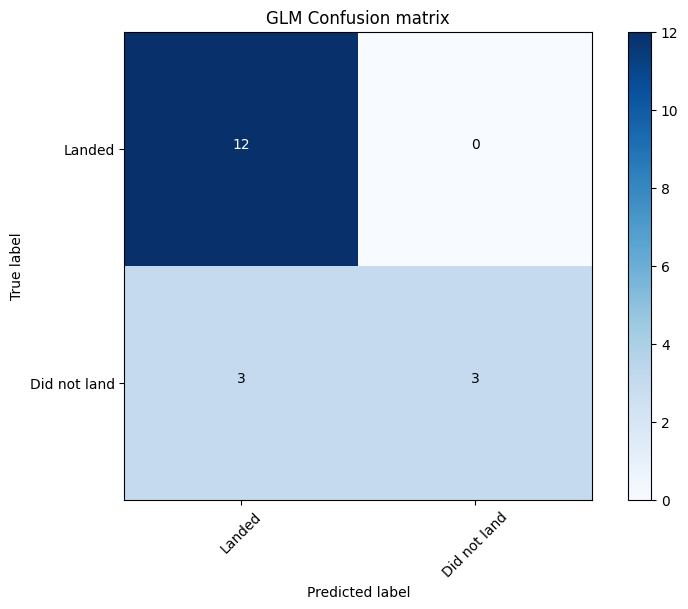

In [137]:
glm_yhat = logreg_cv.predict(X_test)
glm_f1 = f1_score(Y_test, glm_yhat) 
glm_prec = precision_score(Y_test, glm_yhat)
glm_rec = recall_score(Y_test, glm_yhat) 
cnf_matrix = confusion_matrix(Y_test, glm_yhat, labels=[1,0])
np.set_printoptions(precision=2)
print(classification_report(Y_test, glm_yhat))

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Landed', 'Did not land'], normalize= False, title='GLM Confusion matrix')